In [34]:
from dotenv import load_dotenv
load_dotenv()
import pandas as pd
import openpyxl
from db import query

In [35]:
init_total_akses_menu_file = "init_akses_menu_vedita.xlsx"
df_init = pd.read_excel(init_total_akses_menu_file, sheet_name='Sheet1')

In [36]:
df_init

,Nama Menu,Timestamp
0,Kartu SIM,2023-10-25 10:13:09
1,Kartu SIM,2023-10-25 10:13:33
2,Kartu SIM,2023-10-25 10:33:27
3,Kartu SIM,2023-10-25 20:51:50
4,Kartu SIM,2023-10-26 08:07:04
...,...,...
174,ChatGPT,2023-11-08 08:03:47
175,ChatGPT,2023-11-08 08:04:19
176,ChatGPT,2023-11-08 08:04:51
177,ChatGPT,2023-11-08 08:05:12


In [37]:
sql = "select client_ip, app_name, endpoint, access_time FROM VEDITA_LOG_APP WHERE (endpoint LIKE '/vedita-cs-list-subcategory?id_category=%' OR endpoint LIKE '/open-ai%' OR endpoint LIKE '/antrean%') AND app_name = 'VEDITA' AND client_ip = '10.87.7.101' AND access_time BETWEEN '2023-11-15 00:00:00' AND CURRENT_TIMESTAMP  AND methods = 'GET' order by endpoint ASC;"
data = query(sql)

tmp = []

for i, val in enumerate(data):
    if val['endpoint'] == '/antrean':
        data[i]['endpoint'] = 'AntreAja'
    elif val['endpoint'] == '/vedita-cs-list-subcategory?id_category=1':
        data[i]['endpoint'] = 'Kartu SIM'
    elif val['endpoint'] == '/vedita-cs-list-subcategory?id_category=2':
        data[i]['endpoint'] = 'Roaming'
    elif val['endpoint'] == '/vedita-cs-list-subcategory?id_category=3':
        data[i]['endpoint'] = 'Indihome'
    elif val['endpoint'] == '/vedita-cs-list-subcategory?id_category=4':
        data[i]['endpoint'] = 'Telkomsel One'
    elif val['endpoint'] == '/open-ai':
        data[i]['endpoint'] = 'ChatGPT'

    d = {
        "Nama Menu": data[i]['endpoint'],
        "Timestamp": data[i]['access_time'].strftime('%Y-%m-%d %H:%M:%S')
    }
    tmp.append(d)

In [38]:
tmp

[{'Nama Menu': 'AntreAja', 'Timestamp': '2023-11-25 17:13:19'},
 {'Nama Menu': 'AntreAja', 'Timestamp': '2023-11-24 08:12:12'},
 {'Nama Menu': 'AntreAja', 'Timestamp': '2023-11-24 08:11:15'},
 {'Nama Menu': 'AntreAja', 'Timestamp': '2023-11-24 06:58:54'},
 {'Nama Menu': 'AntreAja', 'Timestamp': '2023-11-22 19:43:45'},
 {'Nama Menu': 'AntreAja', 'Timestamp': '2023-11-15 11:20:46'},
 {'Nama Menu': 'AntreAja', 'Timestamp': '2023-11-16 15:33:10'},
 {'Nama Menu': 'ChatGPT', 'Timestamp': '2023-11-17 20:21:47'},
 {'Nama Menu': 'ChatGPT', 'Timestamp': '2023-11-17 20:22:04'},
 {'Nama Menu': 'Kartu SIM', 'Timestamp': '2023-11-15 11:19:19'},
 {'Nama Menu': 'Kartu SIM', 'Timestamp': '2023-11-23 07:58:34'},
 {'Nama Menu': 'Kartu SIM', 'Timestamp': '2023-11-20 08:06:11'},
 {'Nama Menu': 'Kartu SIM', 'Timestamp': '2023-11-19 08:04:28'},
 {'Nama Menu': 'Kartu SIM', 'Timestamp': '2023-11-18 10:49:19'},
 {'Nama Menu': 'Kartu SIM', 'Timestamp': '2023-11-17 08:23:01'},
 {'Nama Menu': 'Kartu SIM', 'Timesta

In [39]:
df_new = pd.DataFrame(tmp)

In [40]:
df_init = pd.concat([df_init, df_new], ignore_index=True)

In [41]:
df_init.sort_values(by=['Timestamp', 'Nama Menu'])

,Nama Menu,Timestamp
34,Indihome,2023-10-19 07:08:18
35,Indihome,2023-10-20 07:52:11
52,Telkomsel One,2023-10-24 07:35:46
36,Indihome,2023-10-24 09:13:43
37,Indihome,2023-10-24 09:15:43
...,...,...
189,Kartu SIM,2023-11-23 07:58:34
182,AntreAja,2023-11-24 06:58:54
181,AntreAja,2023-11-24 08:11:15
180,AntreAja,2023-11-24 08:12:12


In [42]:
from datetime import timedelta, date, datetime
start_date = datetime(2023, 10, 19, 0, 0, 0)
end_date = datetime.now()

In [43]:
import pandas as pd

# Assuming df is your DataFrame and date_column is the column containing dates
df = pd.DataFrame([{
    'date_column': datetime(2023, 1, 1)
}])
df['date_column'] = pd.to_datetime(df['date_column'])

# Specify the date you want to check
target_date = pd.to_datetime('2023-01-01')

# Check if the date exists in the DataFrame
date_exists = target_date in df['date_column'].values

# Print the result
print(f"Does the date {target_date} exist in the DataFrame? {date_exists}")
df

Does the date 2023-01-01 00:00:00 exist in the DataFrame? True


,date_column
0,2023-01-01


In [44]:
# current_date = start_date
# a = date(current_date.year, current_date.month, current_date.day)
# a in tmp_date.dt.date.values

In [45]:
df_init['Timestamp'] = pd.to_datetime(df_init['Timestamp'], dayfirst=True)

In [46]:
# df1 = df_init['Timestamp'].dt.date.value_counts().sort_index().reset_index()
df_init['Timestamp'] = pd.to_datetime(df_init['Timestamp'])

# Extract the date from the 'timestamp' column
df_init['Tanggal'] = df_init['Timestamp'].dt.date
df1 = df_init.groupby(['Tanggal', 'Nama Menu']).size().reset_index(name='Count')

In [47]:
current_date = start_date
index = 0
while current_date <= end_date:
    df_tmp_date = pd.to_datetime(df_init['Timestamp'])
    tmp_date = date(current_date.year, current_date.month, current_date.day)
    if not ((df_init['Nama Menu'] == "Kartu SIM") & (df_tmp_date.dt.date.values == tmp_date)).any():
        new_row = pd.DataFrame([{
            'Tanggal': tmp_date,
            'Nama Menu': 'Kartu SIM',
            'Count': 0
        }])
        df1 = pd.concat([df1, new_row], ignore_index=True)
    if not ((df_init['Nama Menu'] == "Roaming") & (df_tmp_date.dt.date.values == tmp_date)).any():
        new_row = pd.DataFrame([{
            'Tanggal': tmp_date,
            'Nama Menu': 'Roaming',
            'Count': 0
        }])
        df1 = pd.concat([df1, new_row], ignore_index=True)
    if not ((df_init['Nama Menu'] == "Indihome") & (df_tmp_date.dt.date.values == tmp_date)).any():
        new_row = pd.DataFrame([{
            'Tanggal': tmp_date,
            'Nama Menu': 'Indihome',
            'Count': 0
        }])
        df1 = pd.concat([df1, new_row], ignore_index=True)
    if not ((df_init['Nama Menu'] == "Telkomsel One") & (df_tmp_date.dt.date.values == tmp_date)).any():
        new_row = pd.DataFrame([{
            'Tanggal': tmp_date,
            'Nama Menu': 'Telkomsel One',
            'Count': 0
        }])
        df1 = pd.concat([df1, new_row], ignore_index=True)
    if not ((df_init['Nama Menu'] == "AntreAja") & (df_tmp_date.dt.date.values == tmp_date)).any():
        new_row = pd.DataFrame([{
            'Tanggal': tmp_date,
            'Nama Menu': 'AntreAja',
            'Count': 0
        }])
        df1 = pd.concat([df1, new_row], ignore_index=True)
    if not ((df_init['Nama Menu'] == "ChatGPT") & (df_tmp_date.dt.date.values == tmp_date)).any():
        new_row = pd.DataFrame([{
            'Tanggal': tmp_date,
            'Nama Menu': 'ChatGPT',
            'Count': 0
        }])
        df1 = pd.concat([df1, new_row], ignore_index=True)
    current_date += timedelta(days=1)
    index += 1

In [48]:
df1 = df1.sort_values(by=['Tanggal', 'Nama Menu', 'Count'])

In [49]:
menu_names = df1.groupby(['Nama Menu'])['Nama Menu'].apply(lambda x: x.unique())

In [50]:
columns = ['Date']
all_columns = [value[0] for value in menu_names]
columns.extend(all_columns)
df2 = pd.DataFrame()
index = 0
while index < len(df1):
    column_data = ["Date"]
    column_data.extend(df1['Nama Menu'][index:index+6].to_list())
    count_data = df1['Count'][index:index+6].tolist()
    tmp_data = [df1['Tanggal'][index:index+6].to_list()[0]]
    tmp_data.extend(count_data)
    df_tmp = pd.DataFrame([tmp_data], columns=column_data)
    df2 = pd.concat([df2, df_tmp], ignore_index=True)
    index += 6

In [51]:
df2.columns

Index(['Date', 'AntreAja', 'ChatGPT', 'Indihome', 'Kartu SIM', 'Roaming',
       'Telkomsel One'],
      dtype='object')

In [52]:
file_name = f"Vedita_Summary_Menu_{end_date.strftime('%Y-%m-%d')}.xlsx"
writer = pd.ExcelWriter(file_name, engine='xlsxwriter')
workbook = writer.book
worksheet = workbook.add_worksheet('Summary')
writer.sheets['Summary'] = worksheet
df2.to_excel(writer, sheet_name='Summary', index=False, startrow=1, header=False)

header_format = workbook.add_format({
    'bg_color': '#d8db0d',  # your setting
    'bold': True,           # additional stuff...
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'border': 1})

max_width = max([len(str(col)) for col in df_init.columns]) + 2
for col_num, value in enumerate(df2.columns.values):
    worksheet.write(0, col_num, value, header_format)
    worksheet.set_column(col_num, col_num, max_width)

worksheet = workbook.add_worksheet('RAW')
df_init = df_init.drop('Tanggal', axis=1)
df_init = df_init.sort_values(by=['Timestamp', 'Nama Menu'])
df_init.to_excel(writer, sheet_name="RAW", index=False, startrow=1, header=False)
max_width = max([len(str(col)) for col in df_init.columns]) + 6
for col_num, value in enumerate(df_init.columns.values):
    worksheet.write(0, col_num, value, header_format)
    worksheet.set_column(col_num, col_num, max_width)
# writer.save
writer._save()

In [54]:
df3 = df2.copy()

In [213]:
date_30_days_ago = end_date - timedelta(days=31)
df3['Date'] = pd.to_datetime(df3['Date'])
filtered_df = df3[df3['Date'] >= date_30_days_ago]

In [140]:
filtered_df

,Date,AntreAja,ChatGPT,Indihome,Kartu SIM,Roaming,Telkomsel One
0,2023-10-19,0,0,1,0,0,0
1,2023-10-20,0,0,1,0,0,0
2,2023-10-21,0,0,0,0,0,0
3,2023-10-22,0,0,0,0,0,0
4,2023-10-23,0,0,0,0,0,0
5,2023-10-24,0,0,3,0,3,4
6,2023-10-25,2,0,1,4,1,2
7,2023-10-26,8,48,10,14,3,8
8,2023-10-27,23,0,0,0,0,0
9,2023-10-28,6,0,0,0,0,0


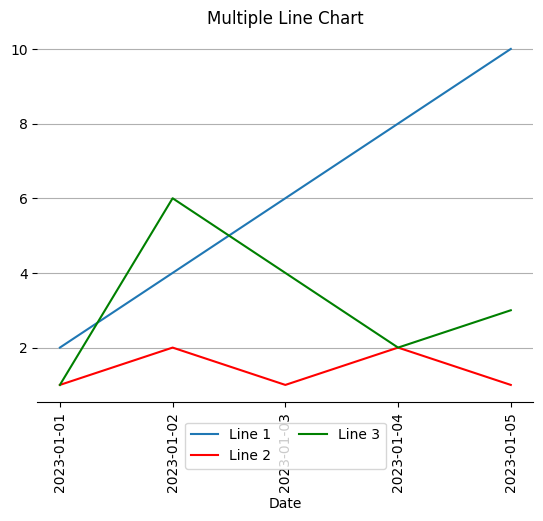

In [97]:
import matplotlib.pyplot as plt

# Sample data for multiple lines
x_values = ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"]
y_values1 = [2, 4, 6, 8, 10]
y_values2 = [1, 2, 1, 2, 1]
y_values3 = [1, 6, 4, 2, 3]

# Plotting the first line
plt.plot(x_values, y_values1, label='Line 1')

# Plotting the second line
plt.plot(x_values, y_values2, label='Line 2', linestyle='-', color='red')  # Customizing linestyle and color
plt.plot(x_values, y_values3, label='Line 3', linestyle='-', color='green')  # Customizing linestyle and color

# Adding labels and title
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('')
plt.title('Multiple Line Chart')

# Adding a legend
plt.legend()

# Display the chart
plt.grid(True, axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)  # Adjust the bbox_to_anchor as needed
plt.show()

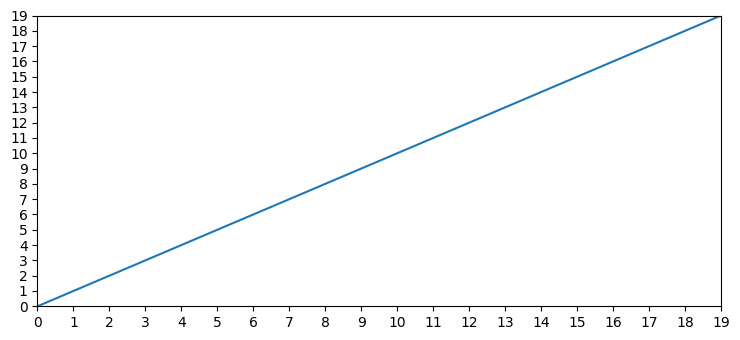

In [150]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.arange(0, 20, 1)
y =np.arange(0, 20, 1)
plt.margins(x=0, y=0)
plt.plot(x, y)
plt.xticks(x)
plt.yticks(y)
plt.show()

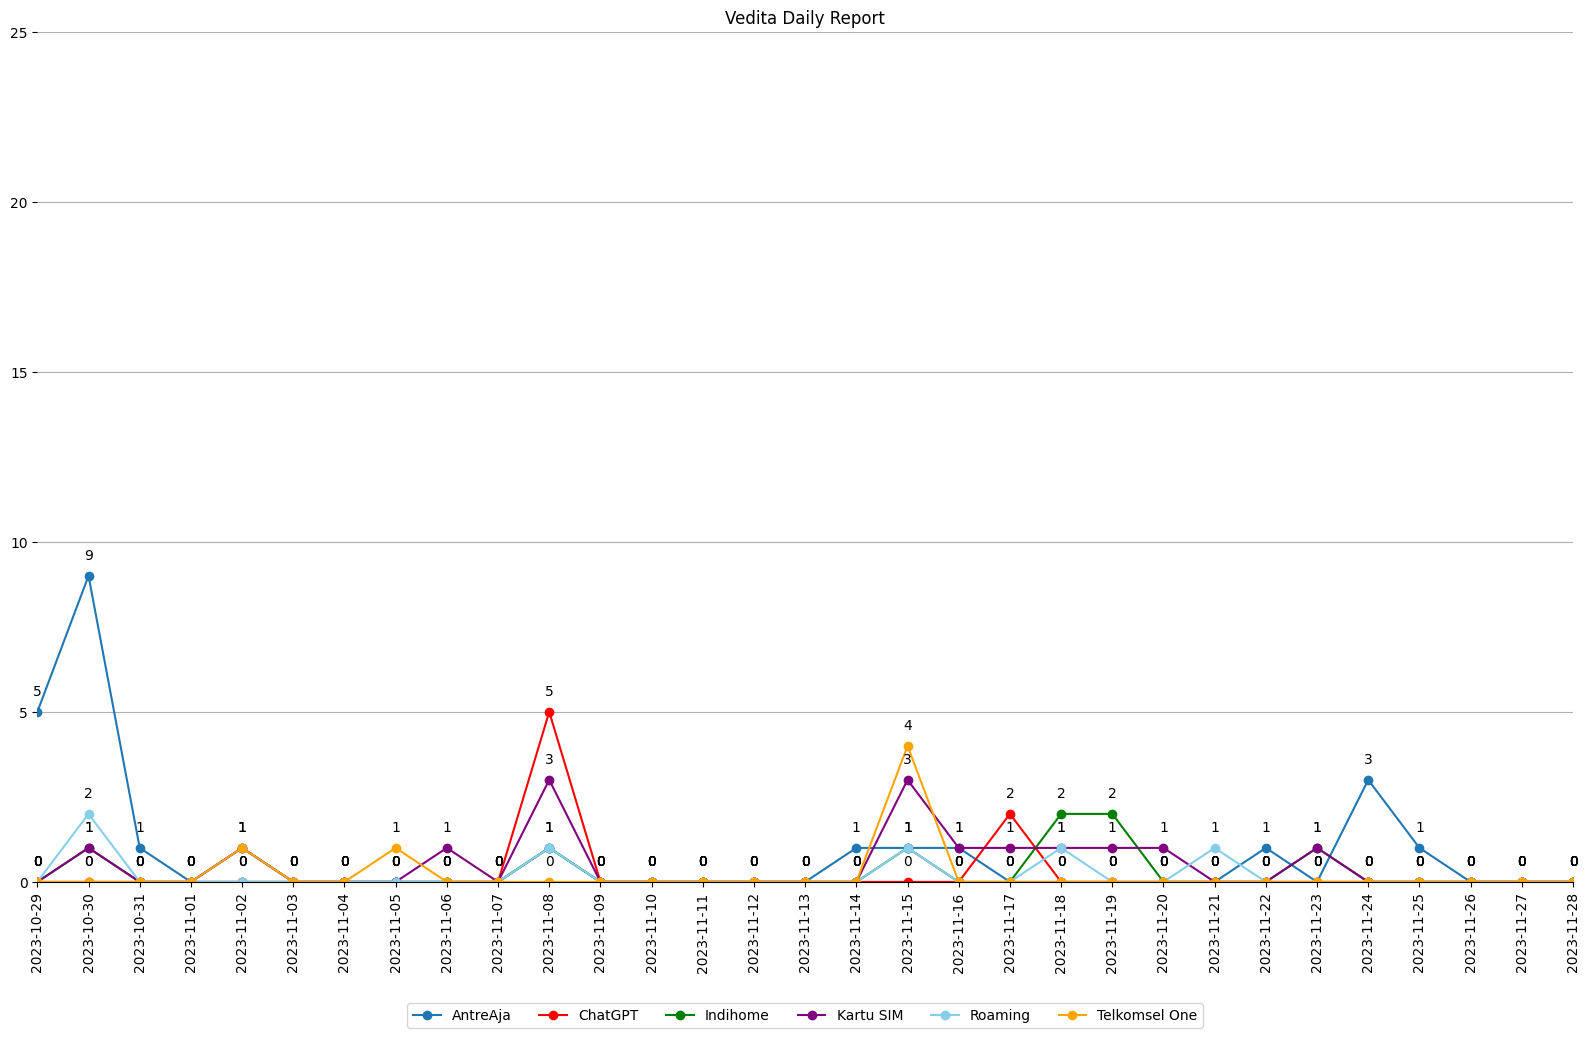

In [215]:
import matplotlib.pyplot as plt

dates = filtered_df['Date'].to_list()
antreaja = filtered_df['AntreAja'].to_list()
chatgpt = filtered_df['ChatGPT'].to_list()
indihome = filtered_df['Indihome'].to_list()
kartu_sim = filtered_df['Kartu SIM'].to_list()
roaming = filtered_df['Roaming'].to_list()
telkomsel_one = filtered_df['Telkomsel One'].to_list()
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.autolayout'] = True
# fig = plt.figure()
plt.plot(dates, antreaja, linestyle="-", marker='o', label='AntreAja')
# ax = fig.add_subplot(111)
plt.margins(x=0, y=0)

max_value = 0

max_value = max(antreaja) if max(antreaja) > max_value else max_value
max_value = max(chatgpt) if max(chatgpt) > max_value else max_value
max_value = max(indihome) if max(indihome) > max_value else max_value
max_value = max(roaming) if max(roaming) > max_value else max_value
max_value = max(telkomsel_one) if max(telkomsel_one) > max_value else max_value
max_value += 20

modifier = 10
index = 0
if max_value <= 40:
    modifier = 5
elif max_value > 40:
    modifier = 10
elif max_value > 199:
    index = 100
    modifier = 20
elif max_value > 399:
    index = 100
    modifier = 50
elif max_value >= 500:
    index = 100
    modifier = 100

x_ticks = []
while index <= max_value:
    x_ticks.append(index)
    index += modifier

# Plotting the second line
plt.plot(dates, chatgpt, label='ChatGPT', linestyle='-', marker='o', color='red')  # Customizing linestyle and color
plt.plot(dates, indihome, label='Indihome', linestyle='-', marker='o', color='green')  # Customizing linestyle and color
plt.plot(dates, kartu_sim, label='Kartu SIM', linestyle='-', marker='o', color='purple')  # Customizing linestyle and color
plt.plot(dates, roaming, label='Roaming', linestyle='-', marker='o', color='skyblue')  # Customizing linestyle and color
plt.plot(dates, telkomsel_one, label='Telkomsel One', linestyle='-', marker='o', color='orange')  # Customizing linestyle and color
# plt.plot(x_values, y_values3, label='Line 3', linestyle='-', color='green')  # Customizing linestyle and color

# Adding labels and title
# plt.xlabel('Date')
plt.xticks(dates, rotation=90)
plt.yticks(x_ticks)
plt.ylabel('')
plt.title('Vedita Daily Report')

for x, y1, y2, y3, y4, y5, y6 in zip(dates, antreaja, chatgpt, indihome, kartu_sim, roaming, telkomsel_one):
    plt.text(x, y1 + 0.4, f'{y1}', ha='center', va='bottom')
    plt.text(x, y2 + 0.4, f'{y2}', ha='center', va='bottom')
    plt.text(x, y3 + 0.4, f'{y3}', ha='center', va='bottom')
    plt.text(x, y4 + 0.4, f'{y4}', ha='center', va='bottom')
    plt.text(x, y5 + 0.4, f'{y5}', ha='center', va='bottom')
    plt.text(x, y6 + 0.4, f'{y6}', ha='center', va='bottom')

# Adding a legend
plt.legend()

# Display the chart
plt.grid(True, axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.18), ncol=6)  # Adjust the bbox_to_anchor as needed
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.savefig(f'my_chart.jpg')
plt.show()